In [1]:
from trainer import UncertaintyTrainer
import os
import numpy as np
import pandas
import torch
from module.config import loadConfig, showConfig
import matplotlib.pyplot as plt
from PIL import Image
%matplotlib inline
from torchvision import transforms
from module.utils import accuracy
from tqdm import tqdm

gpu = "1"
os.environ['CUDA_VISIBLE_DEVICES'] = gpu

class_map = ['airplane','automobile','bird','cat','deer','dog','frog','horse','ship', 'truck']
config_path = "./result/cifar_noise_sym05_ssl_adamW/config.yaml"

epoch = 129

invTrans = transforms.Compose([ transforms.Normalize(mean = [ 0., 0., 0. ],
                                                     std = [ 1/0.229, 1/0.224, 1/0.225 ]),
                                transforms.Normalize(mean = [ -0.485, -0.456, -0.406 ],
                                                     std = [ 1., 1., 1. ]),
                               ])

In [2]:
def show_probs(probs):
    plt.figure(figsize= (8,8))
    probs_mean = torch.mean(probs, dim=0, keepdim=False)
    plt.bar(np.arange(0, 10), probs_mean)
    for data in probs:
        plt.plot(np.arange(0, 10), data)
    plt.xticks(np.arange(0, 10)) # train epochs
    plt.xlabel(class_map)
    plt.yticks(np.arange(0, 1.1, 0.1)) # train epochs
    plt.show()

In [3]:
def show(image):
#     image = Image.open(RESULT_IMAGE_PATH)
    plt.figure(figsize= (2,2))
    plt.imshow(image)
    plt.axis('off')
    plt.show()

In [4]:
def run(index, loader, probs_all, target_val):
    data = loader.dataset[index]
    label_y =target_val[index]
    image_x = data[0]
#     label_y = data[1]

    image_x = invTrans(image_x)
    image = image_x.permute(1, 2, 0)
    show(image)
    print("label_y : ", label_y)
    show_probs(probs_all[:, index].cpu())

In [5]:
device = torch.device("cuda" if torch.cuda.is_available() and gpu != "-1" else "cpu")
config = loadConfig(config_path)
config['noise_type'] = "none"
trainer = UncertaintyTrainer(config, device)

Files already downloaded and verified
Files already downloaded and verified
Training T : 1.0
Number of trainable parameters of Point CNF: 61265


In [6]:
model_path = f'result/{config["output_folder"]}/flow_{str(epoch).zfill(2)}.pt'
encoder_path = f'result/{config["output_folder"]}/encoder_{str(epoch).zfill(2)}.pt'
trainer.load(model_path)
trainer.load_encoder(encoder_path)

## val_loader

In [7]:
MC_sample = 1
mean = 0
std = 0

probs_val, target_val, _, probs_all_val, _  = trainer.sampling(trainer.val_loader, MC_sample, mean, std)
acc_list = accuracy(probs_val,  target_val, topk=(1,2))
acc_top1 = acc_list[0].cpu().item()
acc_top2 = acc_list[1].cpu().item()
print("acc top1: ", acc_top1, " top2 : ", acc_top2)

312it [00:27, 11.20it/s]

acc top1:  83.974365234375  top2 :  91.27604675292969


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


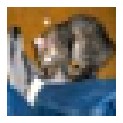

label_y :  tensor(3)


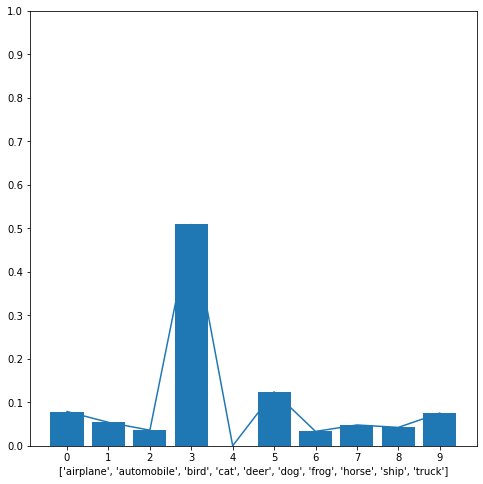

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


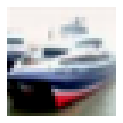

label_y :  tensor(8)


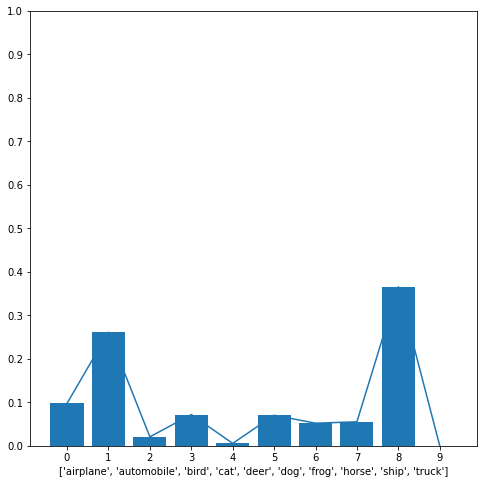

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


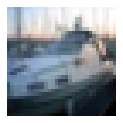

label_y :  tensor(8)


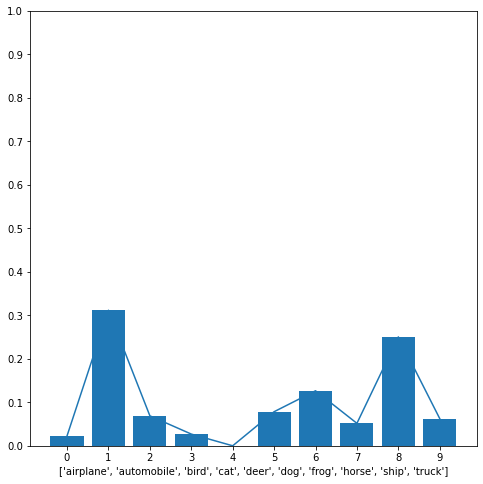

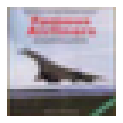

label_y :  tensor(0)


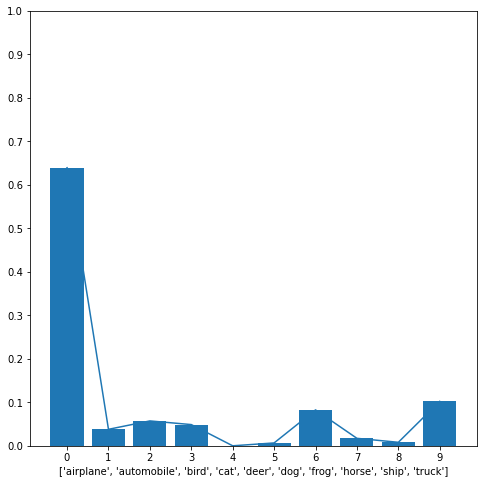

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


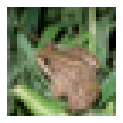

label_y :  tensor(6)


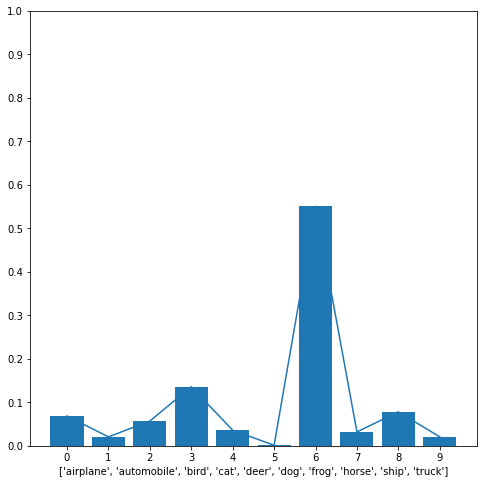

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


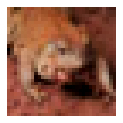

label_y :  tensor(6)


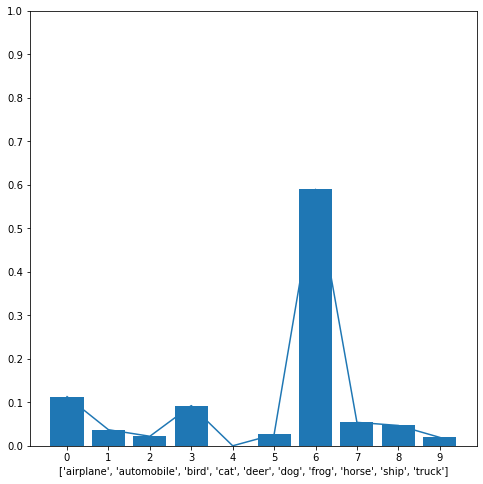

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


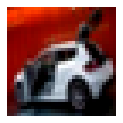

label_y :  tensor(1)


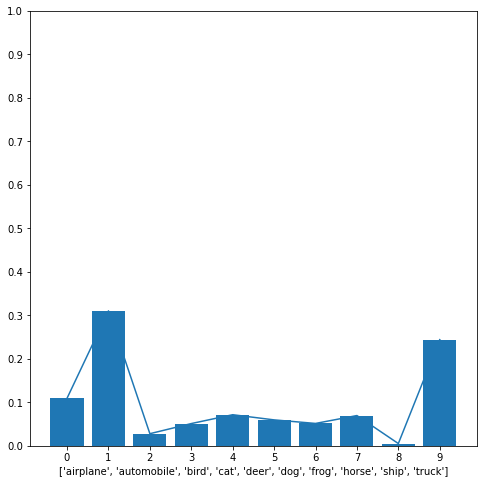

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


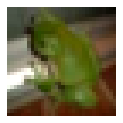

label_y :  tensor(6)


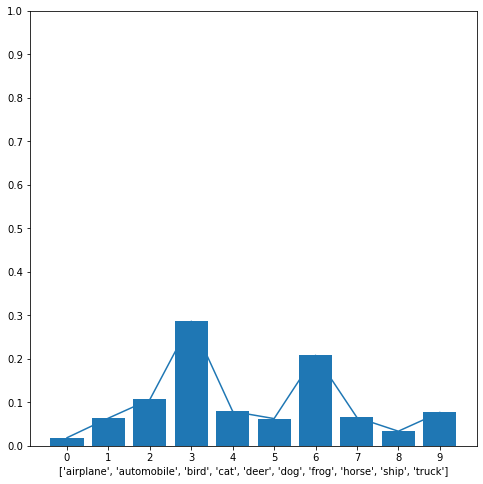

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


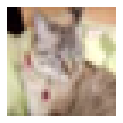

label_y :  tensor(3)


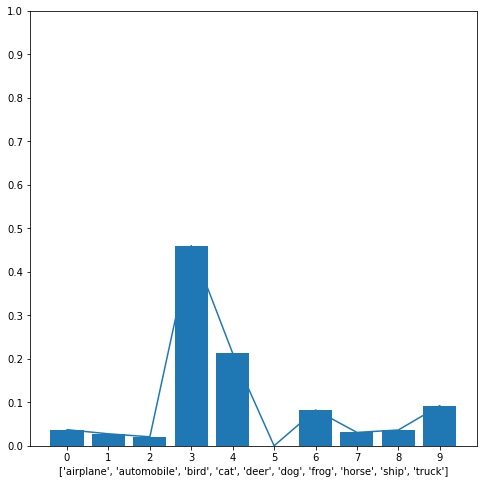

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


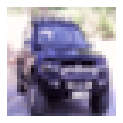

label_y :  tensor(1)


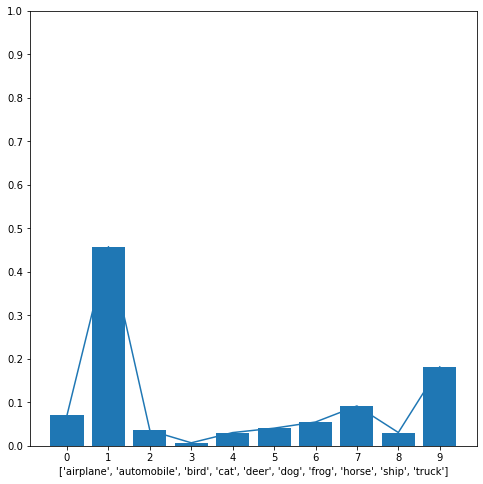

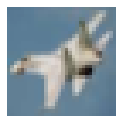

label_y :  tensor(0)


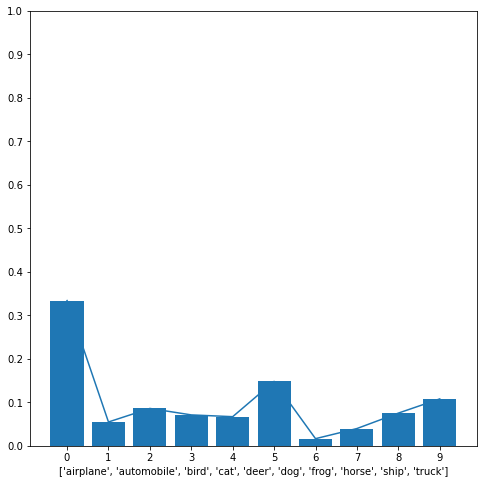

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


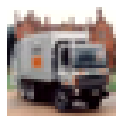

label_y :  tensor(9)


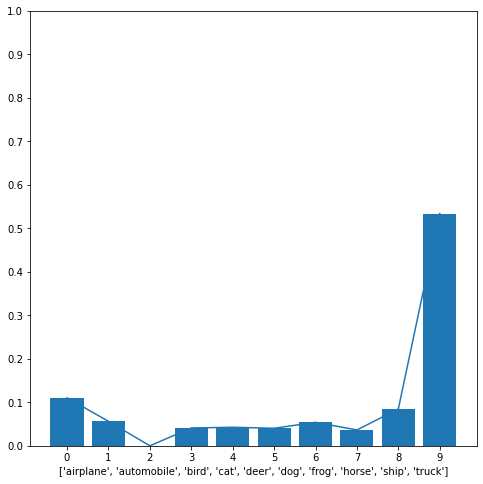

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


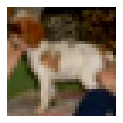

label_y :  tensor(5)


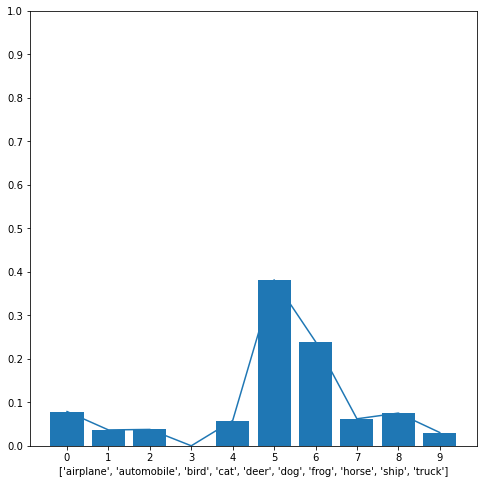

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


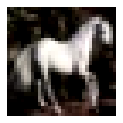

label_y :  tensor(7)


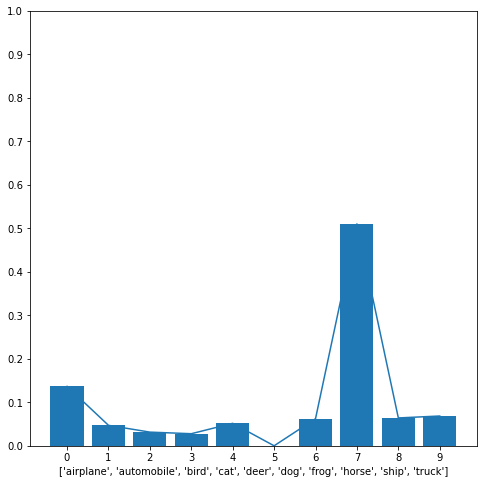

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


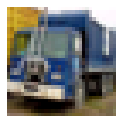

label_y :  tensor(9)


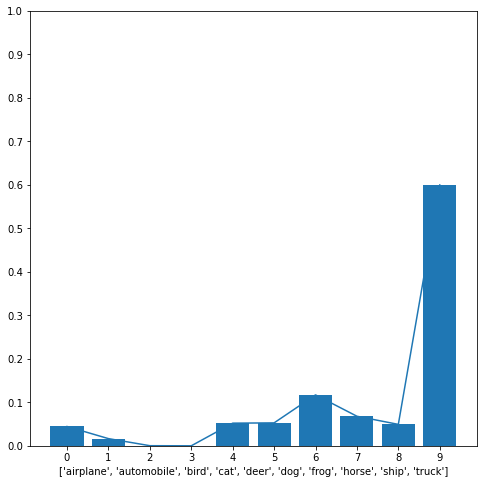

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


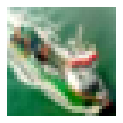

label_y :  tensor(8)


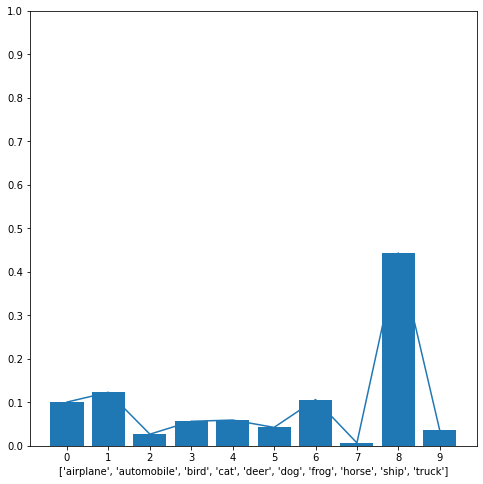

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


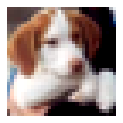

label_y :  tensor(5)


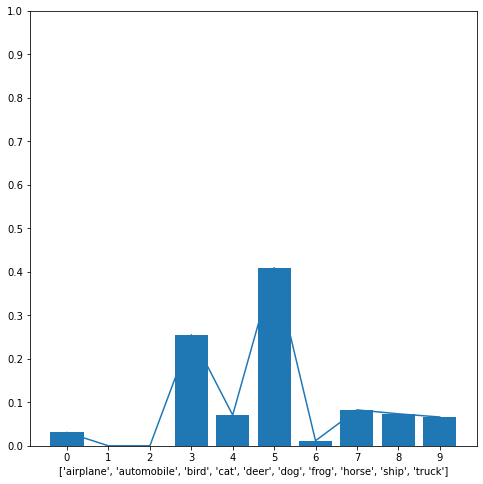

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


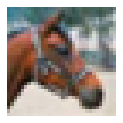

label_y :  tensor(7)


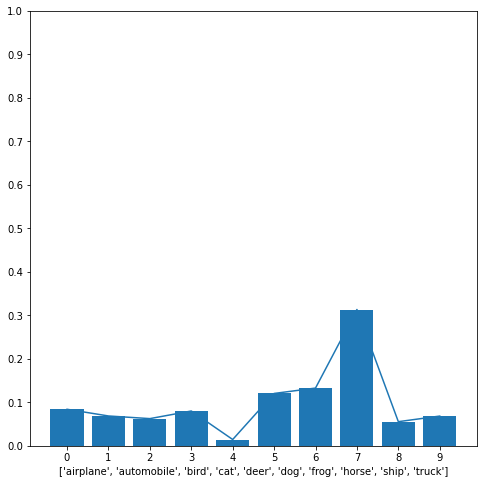

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


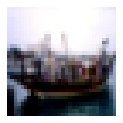

label_y :  tensor(8)


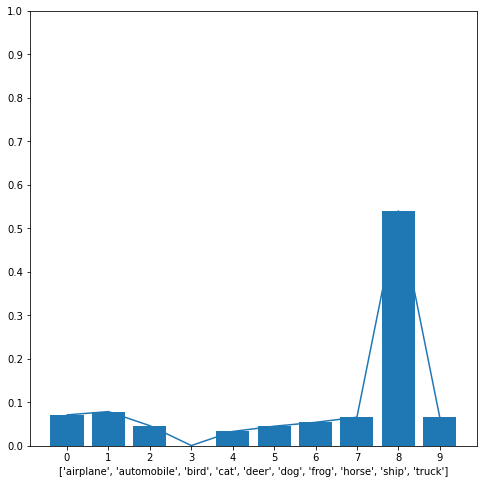

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


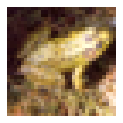

label_y :  tensor(6)


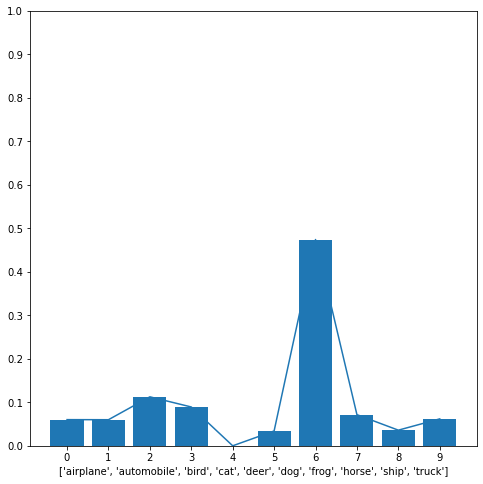

In [26]:
for i in range(20):
    run(i, trainer.val_loader, probs_all_val, target_val)

## train loader

In [49]:
MC_sample = 10
mean = 0
std = 0.2

probs_train, target_train, _, probs_all_train  = trainer.sampling(trainer.train_loader, MC_sample, mean, std)
acc = accuracy(probs_train,  target_train, topk=(1,))[0].cpu().item()
print("acc : ", acc)

7it [00:06,  1.08it/s]


KeyboardInterrupt: 

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


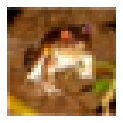

label_y :  tensor(6)


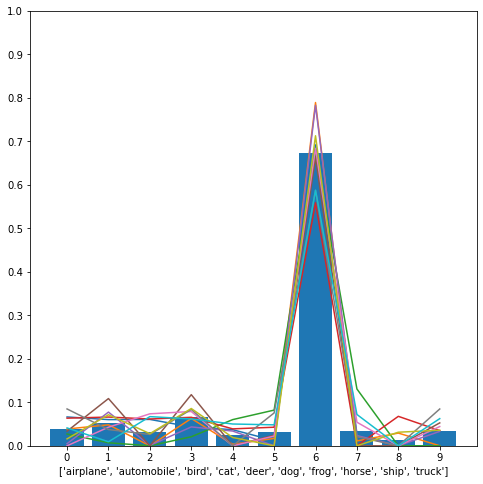

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


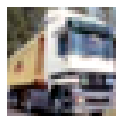

label_y :  tensor(9)


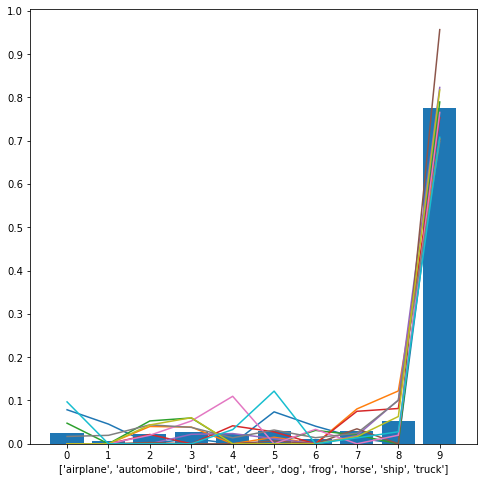

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


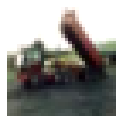

label_y :  tensor(9)


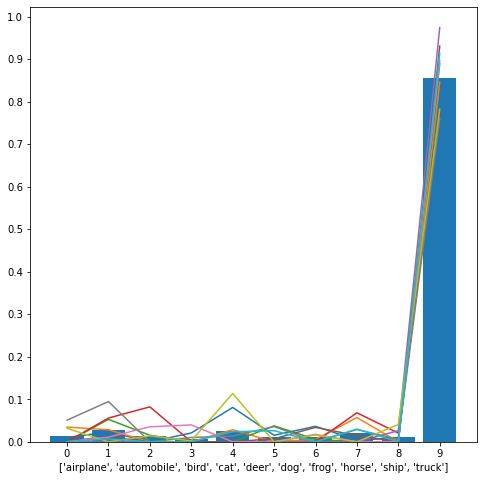

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


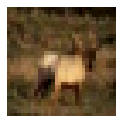

label_y :  tensor(4)


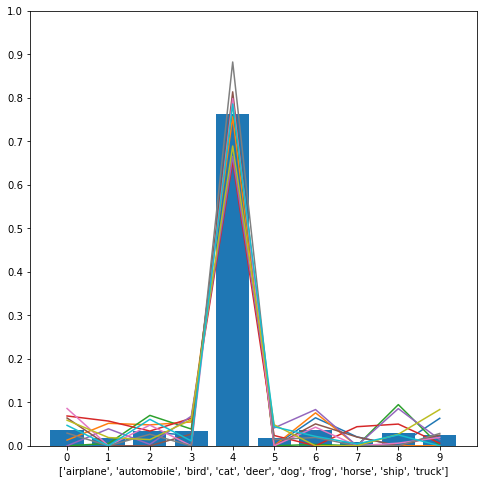

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


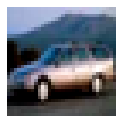

label_y :  tensor(1)


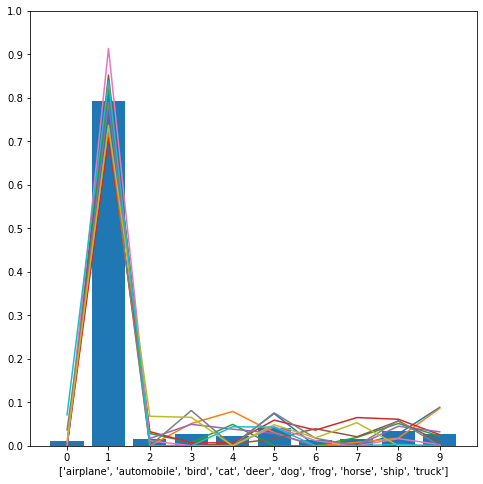

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


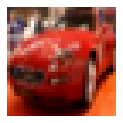

label_y :  tensor(1)


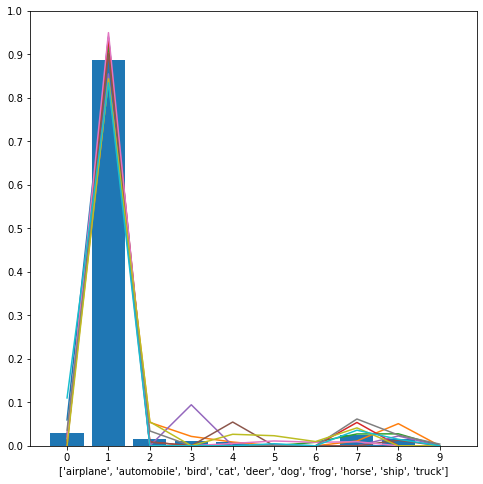

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


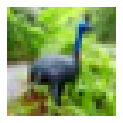

label_y :  tensor(2)


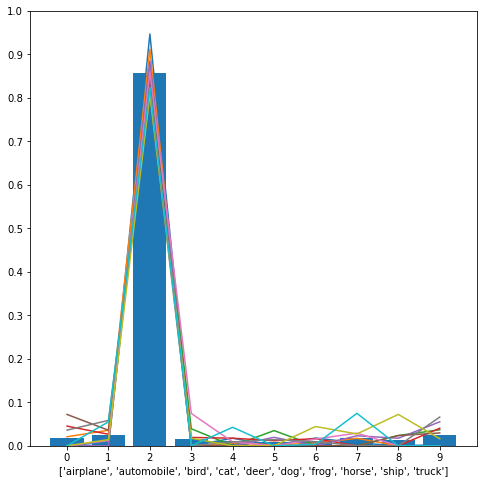

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


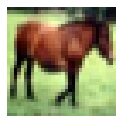

label_y :  tensor(7)


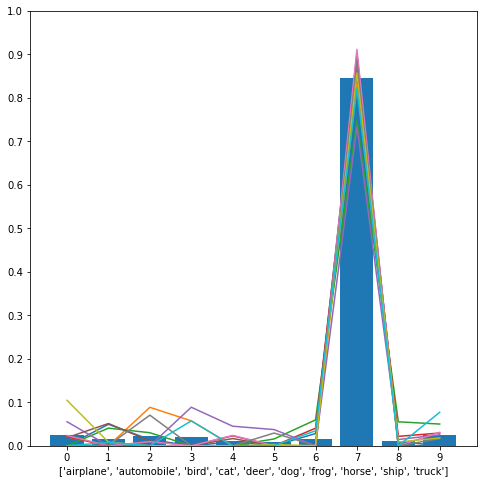

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


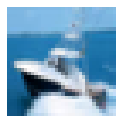

label_y :  tensor(8)


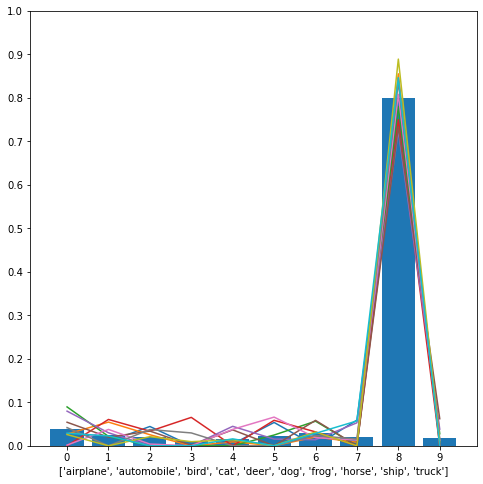

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


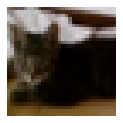

label_y :  tensor(3)


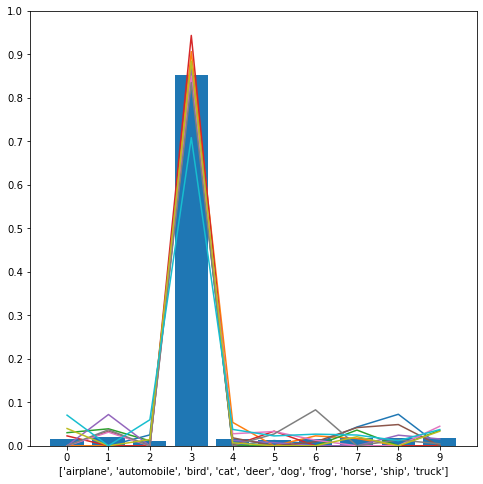

In [10]:
for i in range(10):
    run(i, trainer.train_loader, probs_all_train, target_train)

## error label distribution

In [8]:
def sortByProbability(data):
    tmp = np.sort(data, axis = 1)
    tmp = np.flip(tmp, axis = 1)
    return tmp
def getCorrect(output, target):
    with torch.no_grad():
        maxk = 1 # top 1
        batch_size = target.size(0)

        _, pred = output.topk(maxk, 1, True, True)
        pred = pred.t()
        correct = pred.eq(target.view(1, -1).expand_as(pred))
        return correct
def get_box_plot_data(labels, bp):
    import pandas as pd 
    rows_list = []

    for i in range(len(labels)):
        dict1 = {}
        dict1['label'] = labels[i]
        dict1['min'] = round(bp['whiskers'][i*2].get_ydata()[1], 2)
        dict1['Q1'] = round(bp['boxes'][i].get_ydata()[1], 2)
        dict1['median'] = round(bp['medians'][i].get_ydata()[1], 2)
        dict1['Q3'] = round(bp['boxes'][i].get_ydata()[2], 2)
        dict1['max'] = round(bp['whiskers'][(i*2)+1].get_ydata()[1], 2)
        rows_list.append(dict1)

    return pd.DataFrame(rows_list)

## correct

            label   min    Q1  median    Q3   max
0    Correct_top1  0.19  0.41    0.49  0.55  0.74
1  Incorrect_top1  0.13  0.25    0.31  0.39  0.59
2        All_top1  0.13  0.36    0.47  0.54  0.74
3    Correct_top2  0.05  0.10    0.11  0.14  0.21
4  Incorrect_top2  0.07  0.14    0.17  0.21  0.31
5        All_top2  0.05  0.10    0.12  0.16  0.24
6    Correct_top3  0.04  0.08    0.09  0.10  0.15
7  Incorrect_top3  0.06  0.10    0.12  0.13  0.19
8       All_top13  0.04  0.08    0.09  0.11  0.16


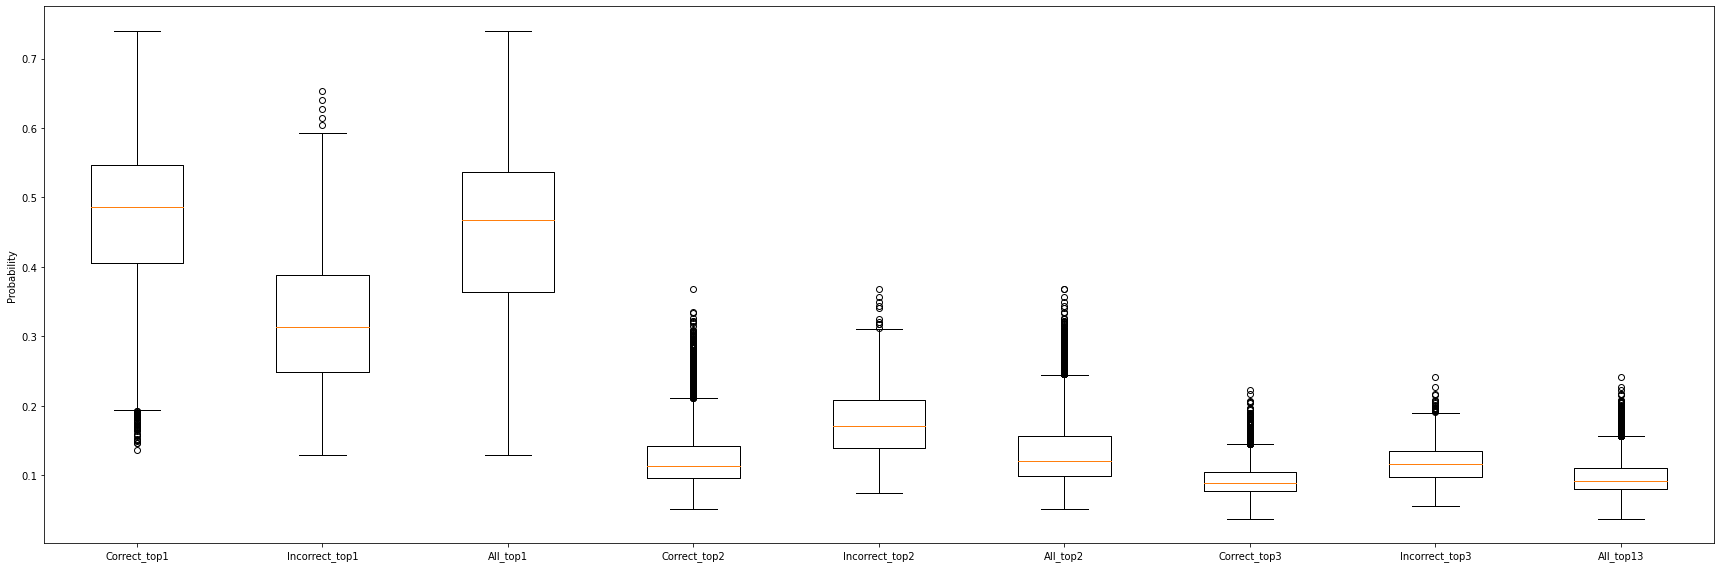

In [10]:
def correctBox(probs, target):
    correct = getCorrect(probs,  target).squeeze(0)
    correct_distribution = probs[correct].numpy()
    incorrect_distribution = probs[correct == False].numpy()
    vis_data = []
    labels = []

    correct_distribution_sort = sortByProbability(correct_distribution)
    incorrect_distribution_sort = sortByProbability(incorrect_distribution)
    probs_sort = sortByProbability(probs)
    
    labels.append('Correct_top1')
    labels.append('Incorrect_top1')
    labels.append('All_top1')

    vis_data.append(correct_distribution_sort[:, 0])
    vis_data.append(incorrect_distribution_sort[:, 0])
    vis_data.append(probs_sort[:, 0])

    labels.append('Correct_top2')
    labels.append('Incorrect_top2')
    labels.append('All_top2')
    vis_data.append(correct_distribution_sort[:, 1])
    vis_data.append(incorrect_distribution_sort[:, 1])
    vis_data.append(probs_sort[:, 1])

    labels.append('Correct_top3')
    labels.append('Incorrect_top3')
    labels.append('All_top13')
    vis_data.append(correct_distribution_sort[:, 2])
    vis_data.append(incorrect_distribution_sort[:,2])
    vis_data.append(probs_sort[:, 2])
    visBox(vis_data, labels)
    
def visBox(vis_data, labels):
    plt.figure(figsize= (24,8))
    bp = plt.boxplot(vis_data, labels = labels)
    print(get_box_plot_data(labels, bp))
    plt.ylabel('Probability')
    plt.tight_layout()
    path = 'box.png'
    plt.savefig(path, dpi=120)
    plt.show()
correctBox(probs_val, target_val)

## classes

           label   min    Q1  median    Q3   max
0     airplane_T  0.20  0.37    0.44  0.49  0.63
1     airplane_F  0.00  0.06    0.11  0.17  0.29
2   automobile_T  0.34  0.49    0.55  0.59  0.69
3   automobile_F  0.04  0.12    0.17  0.22  0.30
4         bird_T  0.16  0.34    0.42  0.51  0.73
5         bird_F  0.00  0.08    0.13  0.18  0.31
6          cat_T  0.15  0.31    0.39  0.49  0.73
7          cat_F  0.02  0.10    0.16  0.20  0.34
8         deer_T  0.14  0.34    0.44  0.53  0.66
9         deer_F  0.02  0.07    0.10  0.14  0.25
10         dog_T  0.20  0.38    0.45  0.51  0.63
11         dog_F  0.00  0.08    0.13  0.18  0.32
12        frog_T  0.29  0.48    0.55  0.61  0.74
13        frog_F  0.02  0.11    0.16  0.21  0.37
14       horse_T  0.34  0.47    0.51  0.55  0.66
15       horse_F  0.04  0.08    0.10  0.15  0.24
16        ship_T  0.31  0.47    0.53  0.58  0.74
17        ship_F  0.04  0.12    0.15  0.21  0.32
18       truck_T  0.29  0.42    0.48  0.51  0.61
19       truck_F  0.

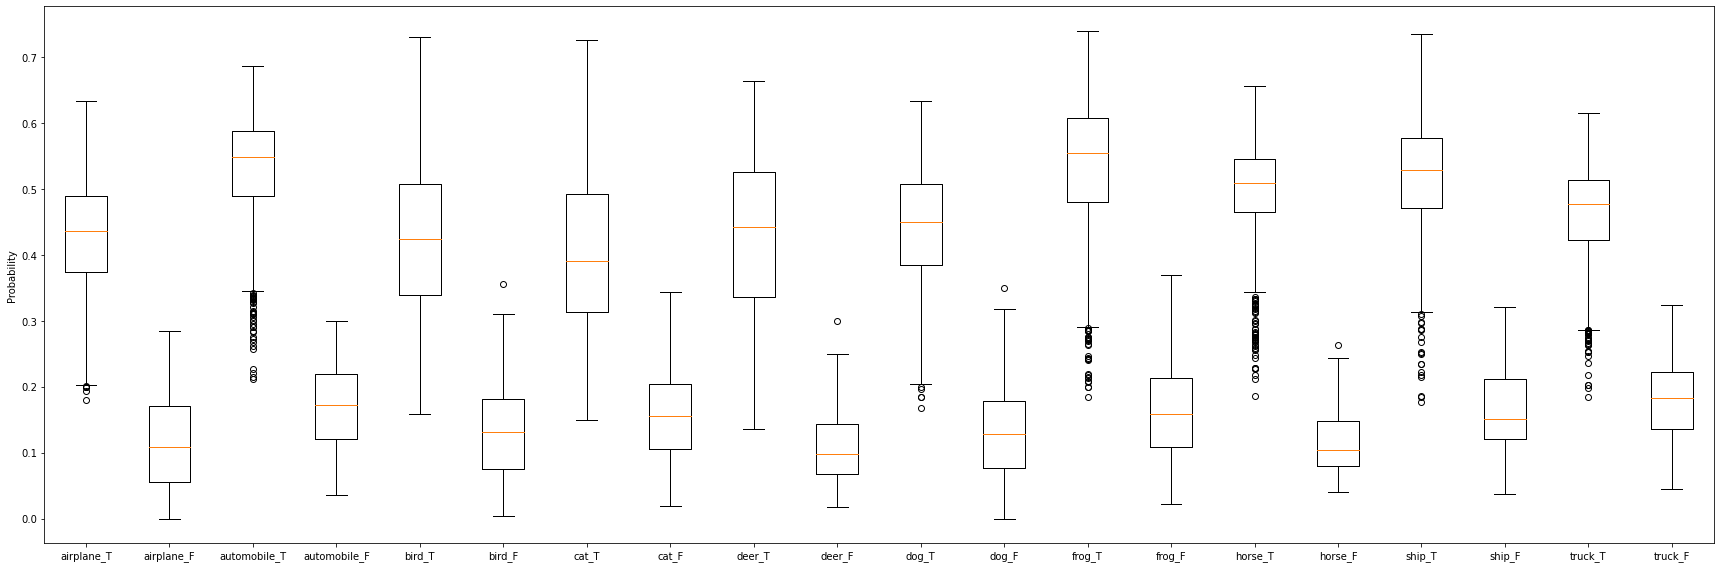

{'airplane': '88.58%',
 'automobile': '95.9%',
 'bird': '68.57%',
 'cat': '67.9%',
 'deer': '73.3%',
 'dog': '74.02%',
 'frog': '91.5%',
 'horse': '91.78%',
 'ship': '94.58%',
 'truck': '93.6%'}

In [12]:
def classesBox(probs, target):
    correct = getCorrect(probs,  target).squeeze(0)
    correct_target = target[correct == True].numpy()
    correct_probs = probs[correct == True].numpy()
    incorrect_target = target[correct == False].numpy()
    incorrect_probs = probs[correct == False].numpy()
    
    correct_count = []
    incorrect_count = []
    vis_data = []
    labels = []
    acc_dist = {}
    
    for i in range(len(class_map)):
        labels.append(str(class_map[i] + '_T'))
        vis_data.append([])
        labels.append(str(class_map[i] + '_F'))
        vis_data.append([])
        correct_count.append(0)
        incorrect_count.append(0)
    for p, t in zip(correct_probs, correct_target): 
        vis_data[t * 2].append(p[t])
        correct_count[t] += 1
    for p, t in zip(incorrect_probs, incorrect_target): 
        vis_data[t * 2 + 1].append(p[t])
        incorrect_count[t] += 1
    visBox(vis_data, labels)
    for i in range(len(class_map)):
        acc_dist[class_map[i]] = str(round(correct_count[i] / (correct_count[i] + incorrect_count[i]) * 100, 2)) + '%'
    return acc_dist
classesBox(probs_val, target_val)

## resnet

In [26]:
def encoder_sample(config_path, loader, epoch):
    from module.resnet import MyResNet
    config_encoder = loadConfig(config_path)
    acc = 0
    encoder_path = f'result/{config_encoder["output_folder"]}/encoder_{str(epoch).zfill(2)}.pt'
    model = MyResNet(in_channels = 3, out_features = 10, isPredictor = False).to(device)
    model.load_state_dict(torch.load(encoder_path))
    model.train()
    prob_vec = []
    target_vec = []
    m = torch.nn.Softmax(dim=1)
    for batch_idx, (data, target) in tqdm(enumerate(loader)):
        data, target = data.to(device), target.to(device)

        output = model(data)
        pred = m(output)
        acc_batch = accuracy(pred, target)[0].cpu()
        acc += acc_batch
        prob_vec.append(pred.data.cpu())
        target_vec.append(target.data.cpu())
    prob_vec = torch.cat(prob_vec, dim=0)
    target_vec = torch.cat(target_vec, dim=0)
    print("acc : ",  acc / (batch_idx + 1))
    return prob_vec.data.cpu(), target_vec.data.cpu()

In [27]:
myresnet_config = "./result/cifar10_resnet_k3_wo_maxPool/config.yaml"
epoch_encoder = 199
prob_resnet, target_resnet = encoder_sample(myresnet_config, trainer.val_loader, epoch_encoder)

312it [00:02, 115.94it/s]

acc :  tensor([92.6182])


            label   min    Q1  median    Q3   max
0    Correct_top1  0.99  1.00    1.00  1.00  1.00
1  Incorrect_top1  0.16  0.58    0.79  0.96  1.00
2        All_top1  0.99  0.99    1.00  1.00  1.00
3    Correct_top2  0.00  0.00    0.00  0.00  0.00
4  Incorrect_top2  0.00  0.02    0.13  0.25  0.50
5        All_top2  0.00  0.00    0.00  0.00  0.01
6    Correct_top3  0.00  0.00    0.00  0.00  0.00
7  Incorrect_top3  0.00  0.00    0.02  0.07  0.17
8       All_top13  0.00  0.00    0.00  0.00  0.00


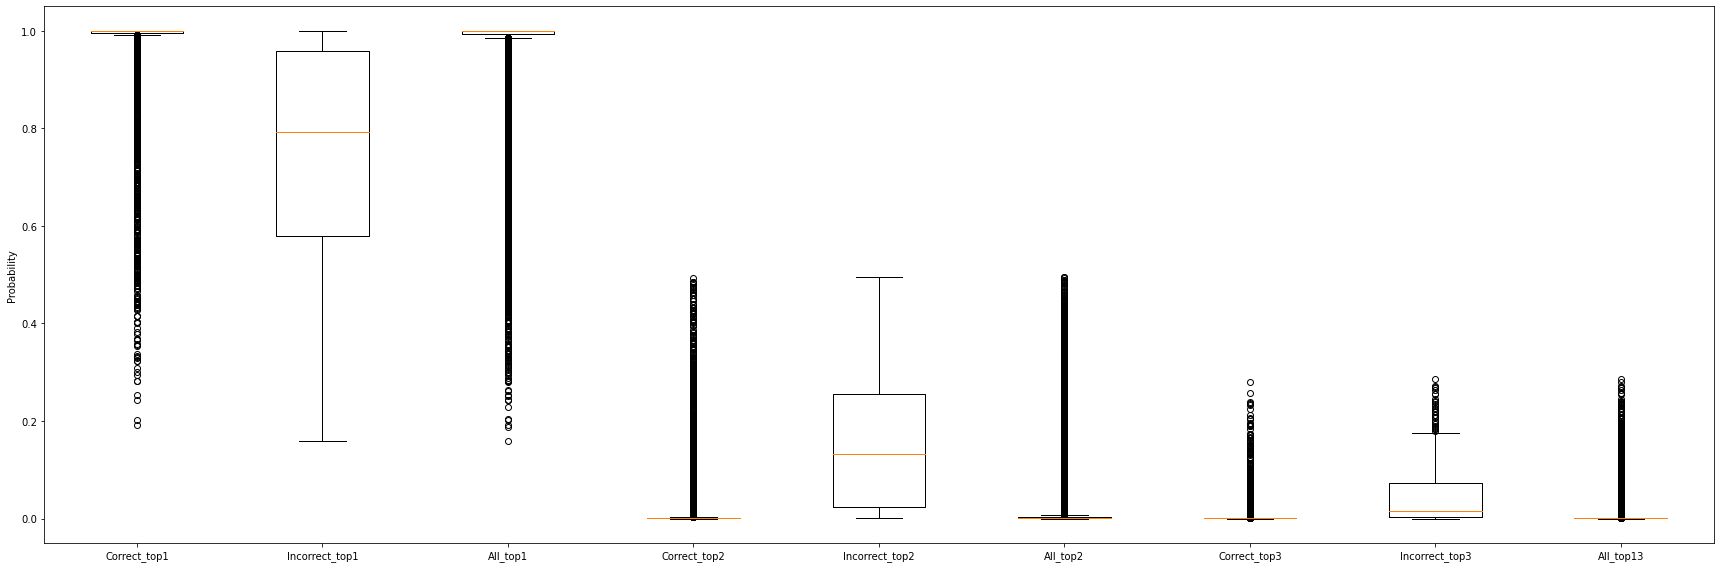

In [28]:
correctBox(prob_resnet, target_resnet)

           label   min    Q1  median    Q3   max
0     airplane_T  0.99  1.00    1.00  1.00  1.00
1     airplane_F  0.00  0.01    0.08  0.20  0.48
2   automobile_T  0.99  1.00    1.00  1.00  1.00
3   automobile_F  0.00  0.02    0.11  0.21  0.41
4         bird_T  0.99  1.00    1.00  1.00  1.00
5         bird_F  0.00  0.01    0.05  0.17  0.32
6          cat_T  0.96  0.98    1.00  1.00  1.00
7          cat_F  0.00  0.00    0.04  0.19  0.46
8         deer_T  0.99  1.00    1.00  1.00  1.00
9         deer_F  0.00  0.03    0.09  0.20  0.39
10         dog_T  0.99  1.00    1.00  1.00  1.00
11         dog_F  0.00  0.01    0.03  0.14  0.33
12        frog_T  0.99  1.00    1.00  1.00  1.00
13        frog_F  0.00  0.01    0.10  0.22  0.49
14       horse_T  0.99  1.00    1.00  1.00  1.00
15       horse_F  0.00  0.01    0.05  0.15  0.31
16        ship_T  0.99  1.00    1.00  1.00  1.00
17        ship_F  0.00  0.02    0.07  0.17  0.40
18       truck_T  0.99  1.00    1.00  1.00  1.00
19       truck_F  0.

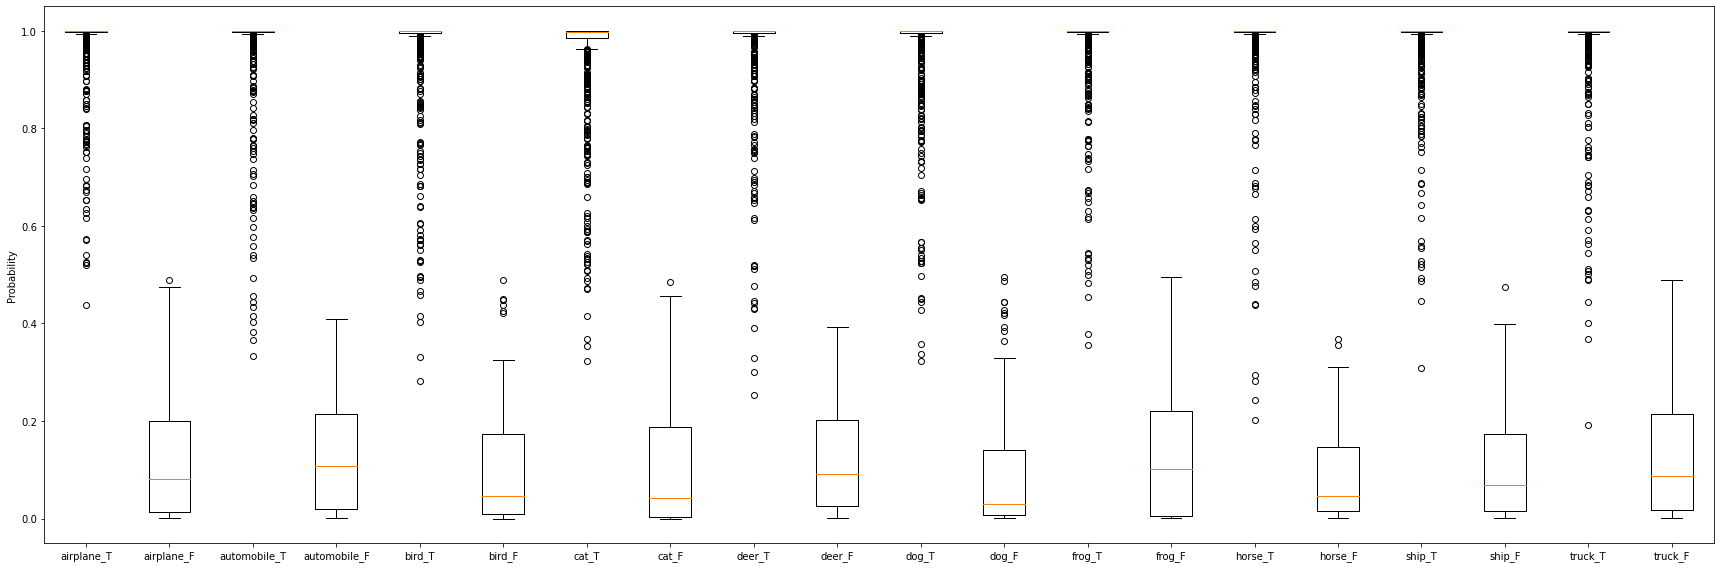

{'airplane': '92.69%',
 'automobile': '93.49%',
 'bird': '90.59%',
 'cat': '87.76%',
 'deer': '93.6%',
 'dog': '88.67%',
 'frog': '95.3%',
 'horse': '95.49%',
 'ship': '94.48%',
 'truck': '94.1%'}

In [32]:
classesBox(prob_resnet, target_resnet)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


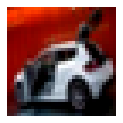

label_y :  tensor(1)


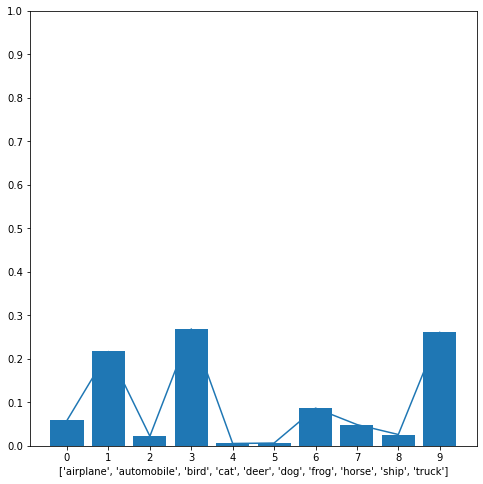

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


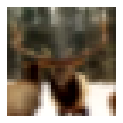

label_y :  tensor(4)


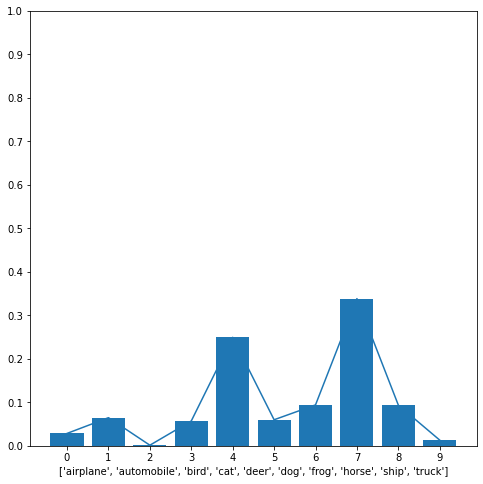

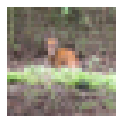

label_y :  tensor(4)


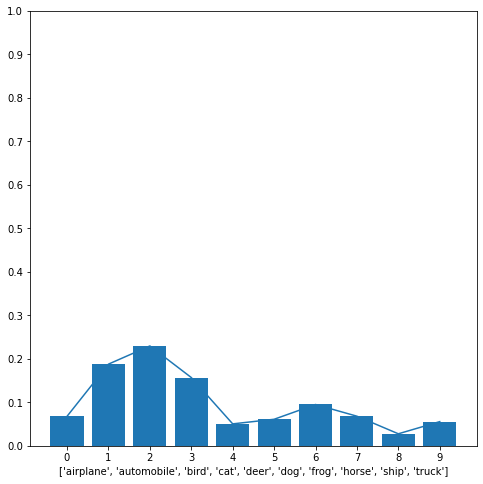

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


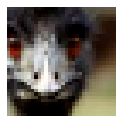

label_y :  tensor(2)


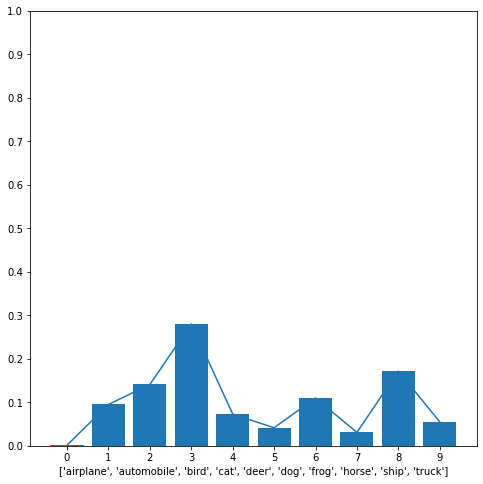

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


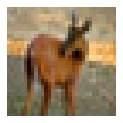

label_y :  tensor(4)


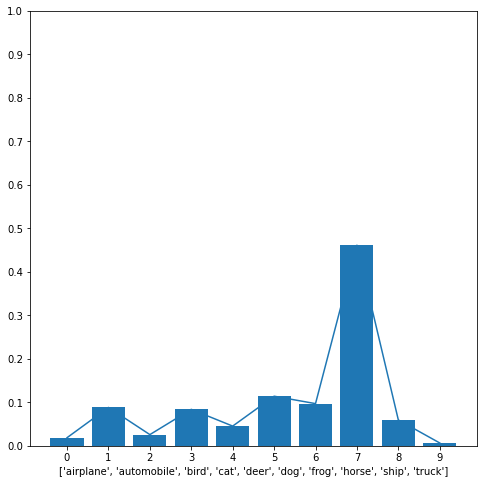

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


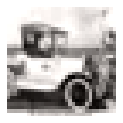

label_y :  tensor(1)


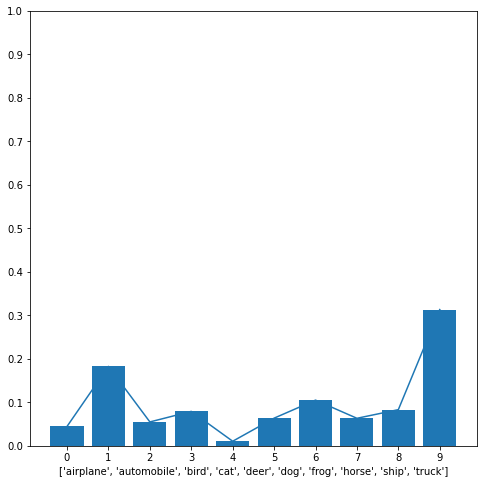

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


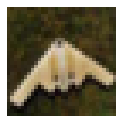

label_y :  tensor(0)


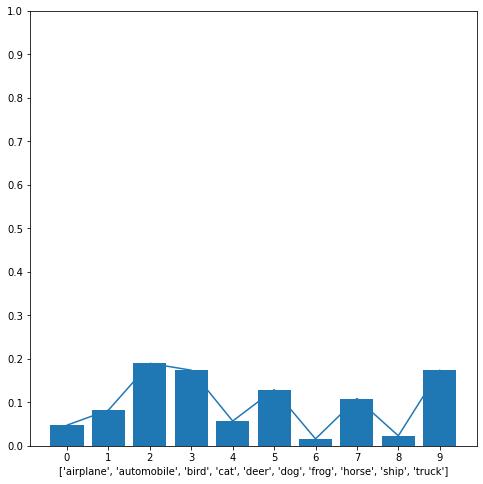

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


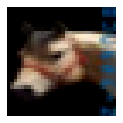

label_y :  tensor(7)


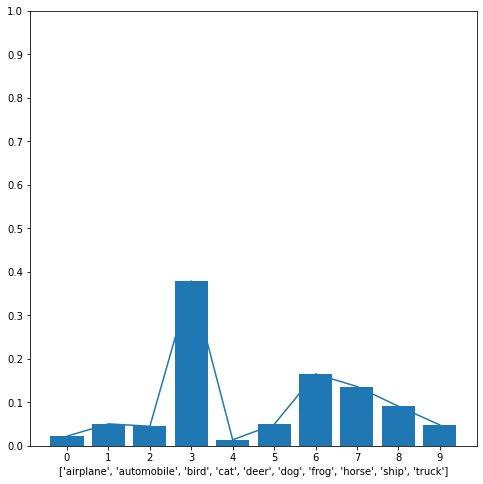

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


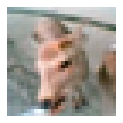

label_y :  tensor(4)


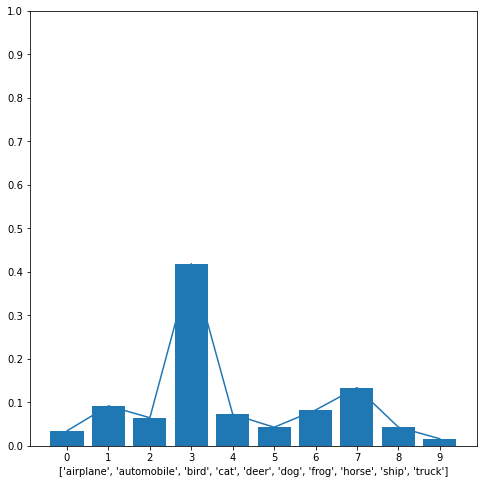

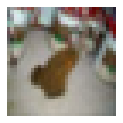

label_y :  tensor(6)


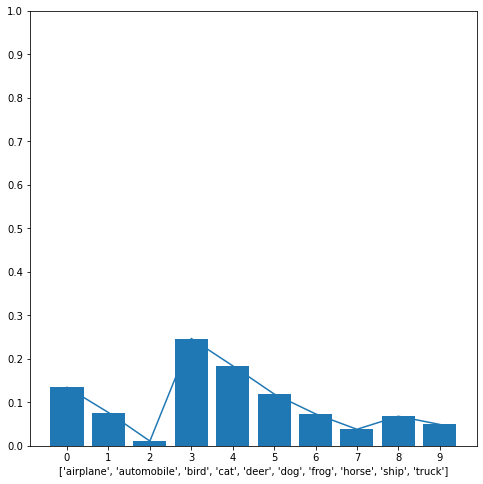

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


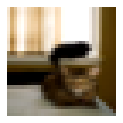

label_y :  tensor(3)


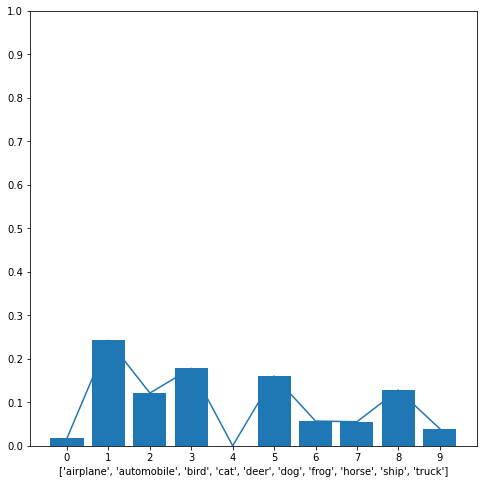

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


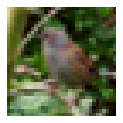

label_y :  tensor(2)


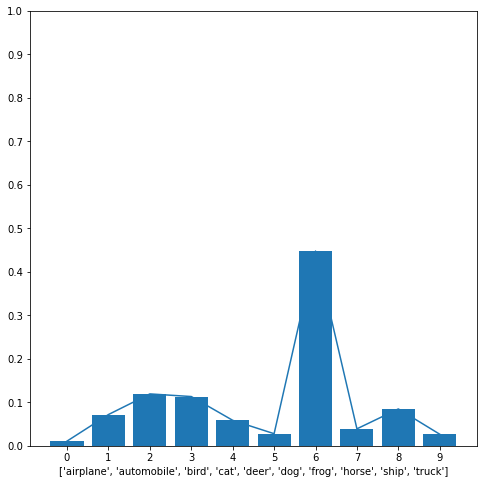

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


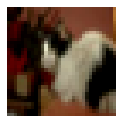

label_y :  tensor(3)


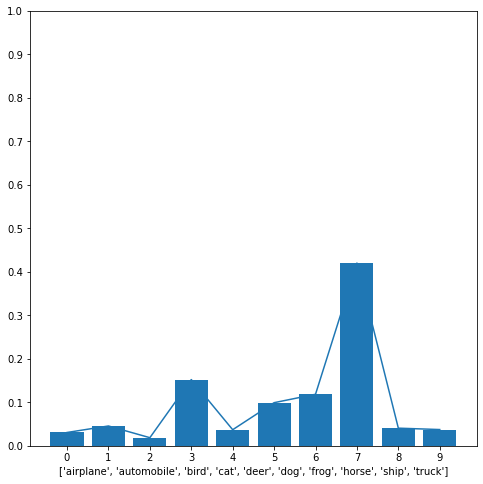

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


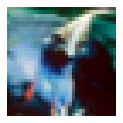

label_y :  tensor(2)


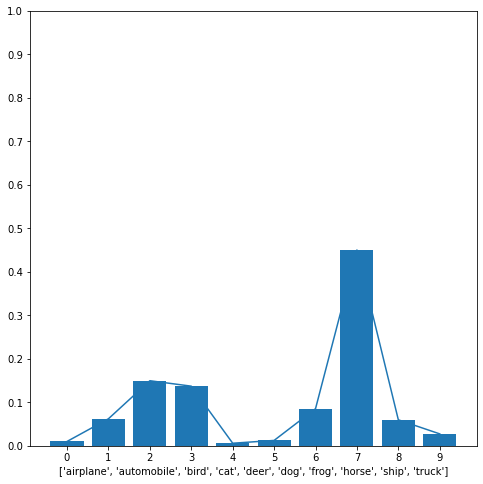

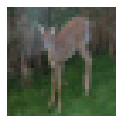

label_y :  tensor(4)


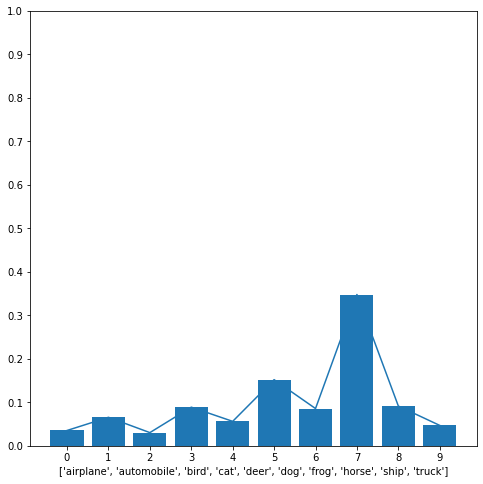

In [118]:
for i in range(100):
    if (not correct.numpy()[i]):
        run(i, trainer.val_loader, probs_all_val, target_val)